In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('uab-data/ubicaciones.csv')
df.head()

,ID_UBICACIO,DS_UBICACIO,ID_TIPUS_DEPENDENCIA,ID_EDIFICI,QL_PORTA,IND_METRES,ID_SN_BAIXA
0,C0/035.3,Arxiu Gestió Acadèmica Biocièn,16,C,C0/035.3,16.0,N
1,C0/019,Arxiu Gestió Acadèmica Cièncie,1,C,C0/019,26.0,N
2,A/1043,Arxiu Of.Coord.Institucional,1,A,A/1043,27.0,N
3,B7/050B,Ascensor,45,B,B7/050B,3.0,N
4,B9/002,Ascensor,45,B,B9/002,4.0,N


In [133]:
df= df.dropna(axis=0,how='any')
df['DS_UBICACIO'] = df['DS_UBICACIO'].str.lower()
df.drop(columns=['QL_PORTA'], inplace=True)
df.tail()

,ID_UBICACIO,DS_UBICACIO,ID_TIPUS_DEPENDENCIA,ID_EDIFICI,IND_METRES,ID_SN_BAIXA
9309,N/-1011.3,vestíbul díposit d-10,43,N,3.0,N
9310,V7/001,vestíbul entrada llatzaret,43,V,7.0,N
9311,G5/0X1,vestíbul exterior facultat,14,G,221.0,N
9312,QS/1010,vestíbul lavabo homes,23,Q,3.0,N
9313,C5/1080,vestíbul lavabos,23,C,8.0,N


In [134]:
inclusiones = ['lab.', 'laboratori', 'aula', 'seminaris']
exclusiones = ['accés', 'despatx', 'magatzem', 'passadís', 'lavabos', 'labavos', 'investigació']
p_inc = "|".join(inclusiones)
p_excl = "|".join(exclusiones)
df_fin = df[df['DS_UBICACIO'].str.contains(p_inc)]
df_fin = df_fin[~df_fin['DS_UBICACIO'].str.contains(p_excl, case=False, na=False)]
df_fin = pd.concat([df_fin[df_fin['ID_EDIFICI']=='Q'], df_fin[df_fin['ID_EDIFICI']=='C'], df_fin[df_fin['ID_EDIFICI']=='B']], ignore_index=True)

#print(df_fin.DS_UBICACIO.unique().tolist())
df_fin.reset_index(drop=True, inplace=True)
df_fin.head()

,ID_UBICACIO,DS_UBICACIO,ID_TIPUS_DEPENDENCIA,ID_EDIFICI,IND_METRES,ID_SN_BAIXA
0,Q1/1003,aula q1/1003 (dues portes),4,Q,106.0,N
1,Q3/0013,aula q3/0013,4,Q,50.0,N
2,Q4/1013,aula q4/1013 (dues portes),4,Q,104.0,N
3,Q1/0007,aula d'informàtica a (2 portes,7,Q,103.0,N
4,Q3/0005,aula docent,4,Q,106.0,S


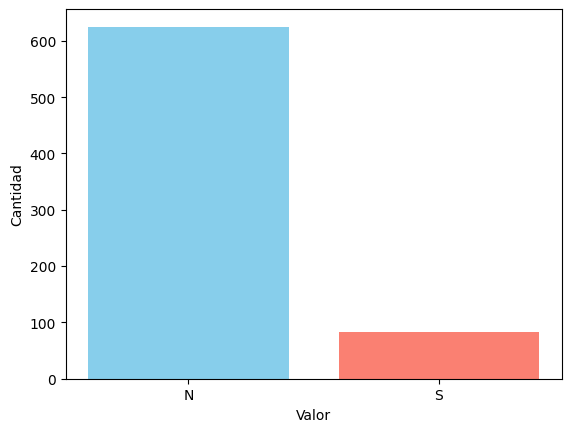

In [135]:
baixa_count = df_fin['ID_SN_BAIXA'].value_counts()
plt.bar(baixa_count.index, baixa_count.values, color=['skyblue', 'salmon'])
plt.ylabel('Cantidad')
plt.xlabel('Valor')
plt.show()

df_fin = df_fin[df_fin['ID_SN_BAIXA'] == 'N']
df_fin.drop(columns=['ID_SN_BAIXA'], inplace=True)
df_fin.reset_index(drop=True, inplace=True)

In [137]:
df_fin.to_csv('cleaned-data/ubicaciones_cleaned.csv', index=False)